In [1]:
# %pylab inline
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Plotting


In [2]:
print("hello world!")

hello world!


In [3]:
#print out pi to different sig figs
print("%7.3f" % pi)
print("%12.8f" % pi)
print("%19.15f" % pi)

  3.142
  3.14159265
  3.141592653589793


# Lennard-Jones Potential



The Lennard-Jones potential describes ...
\begin{equation}
V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]
\end{equation}

... all distances can be expressed in units of $\sigma$, so we can define a dimensionless distance $r'$ such that $r = r' \sigma$.

In [4]:
def V(r, eps):
    return 4.0*eps*((1./r)**12 - (1./r)**6.)

In [5]:
rs = arange(0.8, 2.0, 0.01)
## OR can use the number of points
rs = linspace(0.9, 2.0, 100)

<IPython.core.display.Javascript object>


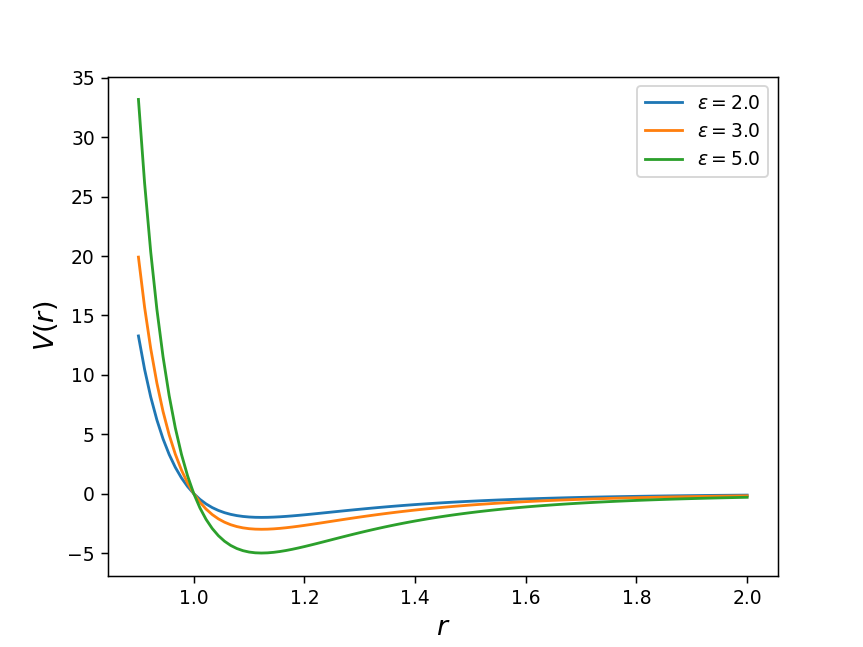

Text(0.5, 0, '$r$')

In [7]:
# here's one way to do it.  If you are plotting a function at different parameter values
# then why not iterate over a list of those parameter values.

epsilons = [2.0, 3.0, 5.0]
for eps in epsilons:
    plot(rs, V(rs, eps))
labels = [r'$\epsilon='+str(eps)+'$' for eps in epsilons]
legend(labels, loc=0)   # loc=0 picks the best location for the legend
ylabel(r'$V(r)$', size='x-large')
xlabel(r"$r$", size='x-large')

<IPython.core.display.Javascript object>


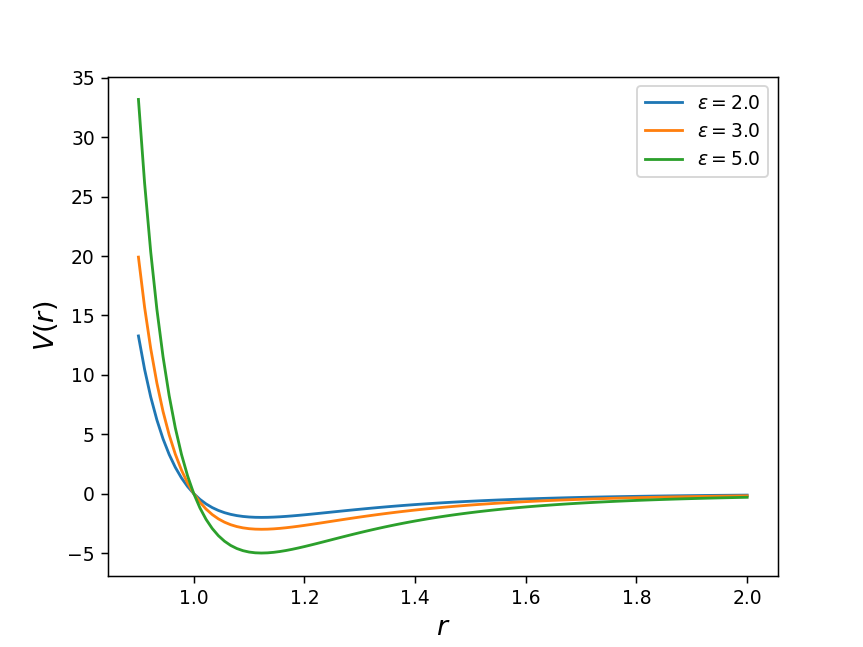

Text(0.5, 0, '$r$')

In [8]:
# here's another method where you use the 'label' option in the plot function
epsilons = [2.0, 3.0, 5.0]
for eps in epsilons:
    plot(rs, V(rs, eps), label=r'$\epsilon='+str(eps)+'$')
# legs = [r'$\epsilon='+str(eps)+'$' for eps in epsilons]
# legend(legs, loc=0)
legend()
ylabel(r'$V(r)$', size='x-large')
xlabel(r"$r$", size='x-large')

# Trajectory analysis

In [9]:
# genfromtxt is very useful. it has a range of options that you can read up on
data = genfromtxt('droid_traj.csv', delimiter=',')

In [10]:
#shape of the data
shape(data)

(250, 2)

In [ ]:
# data has 2 columns, 1 for x and 1 for y.  The time spacing is dt = 1 s

<IPython.core.display.Javascript object>


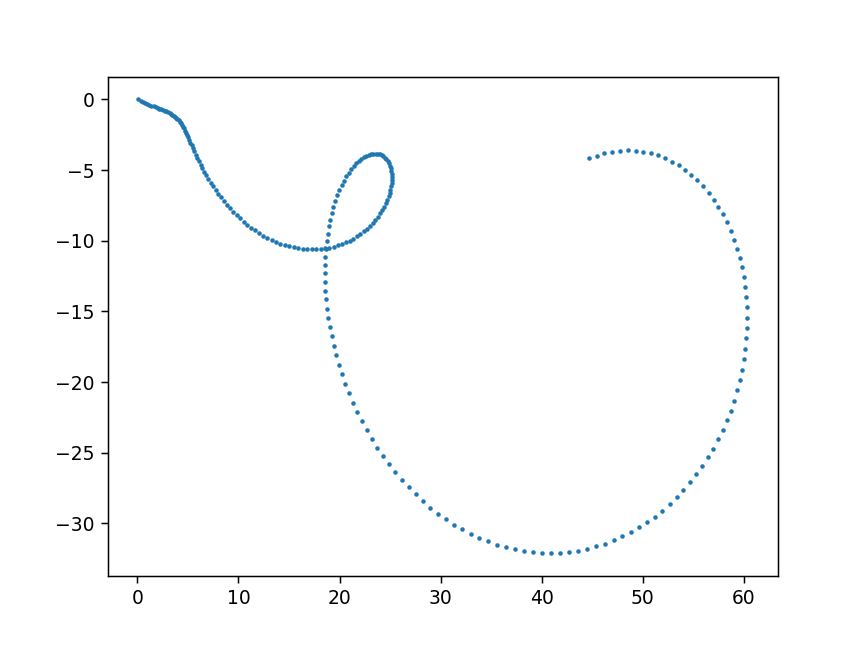

In [11]:
# the option 's' conrols the size of the points
scatter(data[:,0], data[:,1], s=2)

In [21]:
# the first (0) column of data is 'x', the 2nd column (1) is y. You can columns using data[:,i] where
# i is the column of interest.  Because they are arrays, you can do mathematical operations on them
# the command 'diff' does a forward difference of points, but makes the resulting list 1 point smaller
# the command gradient does a central difference (a better approximation) and returns a list that
# is the same length as the original

# here you compute the mangitude of the step size sqrt(dx^2 + dy^2) and it returns an array of
# all the values

# then to get the cummulative pathlength you can use the command 'cumsum'

ds = sqrt(diff(data[:,0])**2 + diff(data[:,1])**2 )
s = cumsum(ds)  # array of pathlengths, s(t)
s = insert(s, 0, 0.0)   # put a 0 in at the 1st position

# a more succinct version that sums the squares of the 1st 2 columns.  For an array, axis= 0 are the
# rows, and axis=1 are the columns.  If you want to sum over rows (default) you do sum( ..., axis=0)
# and if you want to sum over columns you do sum(..., axis=1)

# ds = sqrt( sum( diff(data[:,:2],axis=0)**2, axis =1 ))
# s = cumsum(ds)
# s = insert(s, 0, 0.0)

In [22]:
s[:10]

array([0.        , 0.22657176, 0.45698796, 0.68662744, 0.91382578,
       1.13748713, 1.35678815, 1.5710813 , 1.77985437, 1.98271194])

<IPython.core.display.Javascript object>


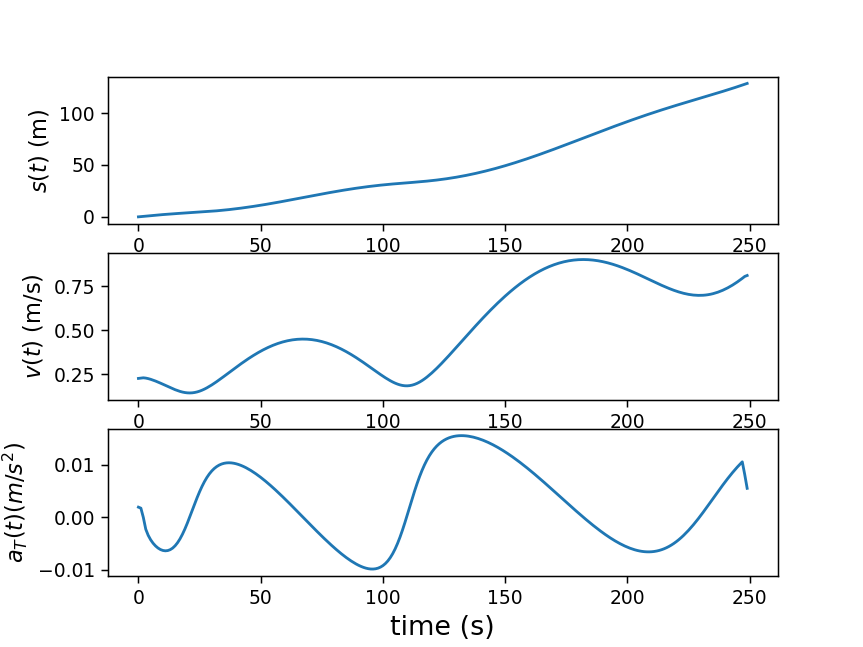

Text(0.5, 0, 'time (s)')

In [23]:
subplot(311)
plot(s)
ylabel(r'$s(t)$ (m)', size='large')
subplot(312)
plot(gradient(s))  # speed
ylabel(r'$v(t)$ (m/s)', size='large')
subplot(313)
plot(gradient(gradient(s)))  # tangential acceleration
ylabel(r'$a_T(t) (m/s^2)$', size='large')
xlabel('time (s)', size='x-large')

<IPython.core.display.Javascript object>


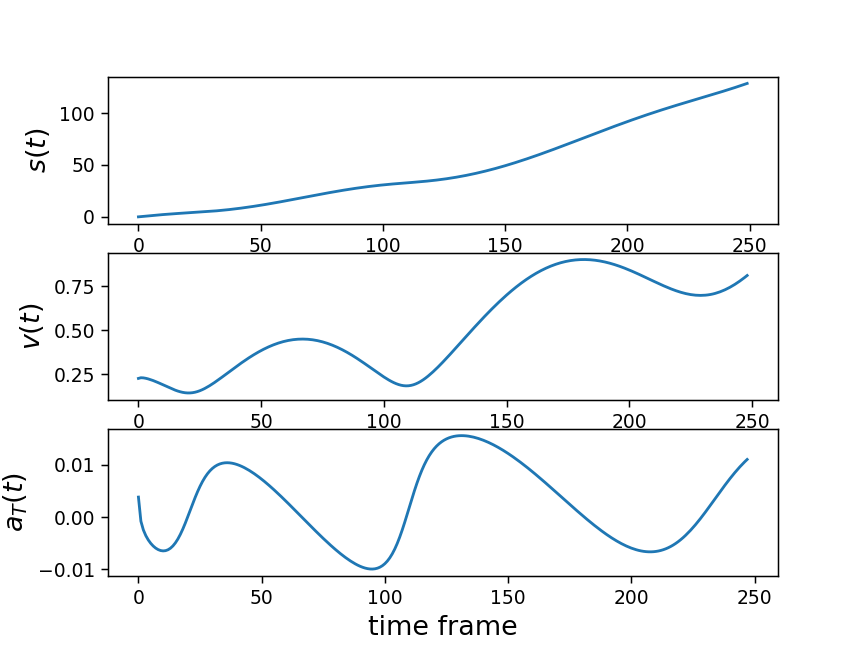

Text(0.5, 0, 'time frame')

In [24]:
# or using 'diff', but now you will lose the endpoint everytime you call 'diff'
subplot(311)
plot(s)
ylabel(r'$s(t)$', size='x-large')
subplot(312)
plot(diff(s))
ylabel(r'$v(t)$', size='x-large')
subplot(313)
plot(diff(diff(s)))
ylabel(r'$a_T(t)$', size='x-large')
xlabel('time frame', size='x-large')

<IPython.core.display.Javascript object>


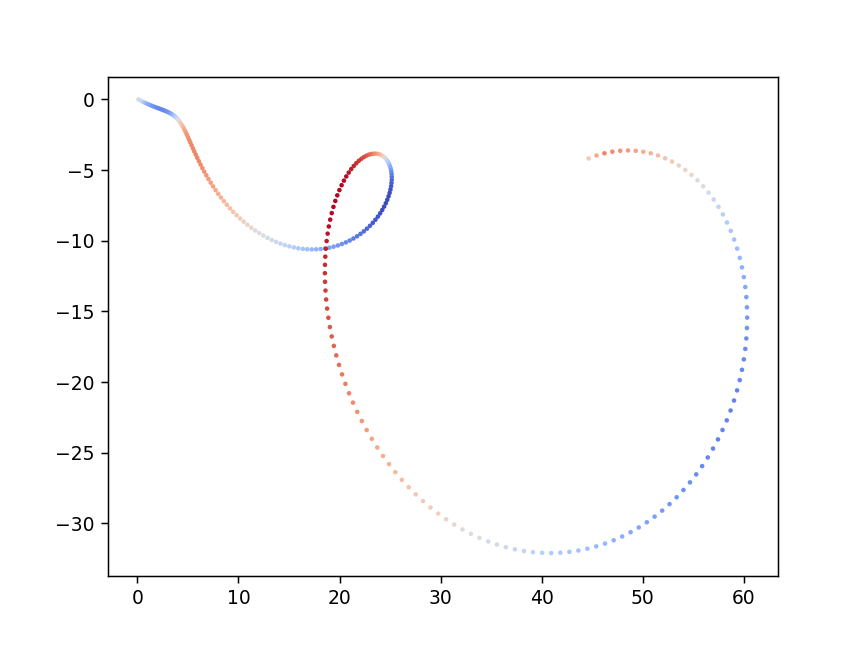

In [25]:
# you can colour the scatter plot using the option 'c'.  It takes in an array of values that is the
# same length as the number of points
a_T = gradient(gradient(s))
scatter(data[:,0], data[:,1], c=a_T, cmap='coolwarm', s=2)

## Random numbers

In [26]:
a = 12
c = 0
m = 143

x =1
for i in range(12):
    x = (a*x+c) % m
    print(i, x)

0 12
1 1
2 12
3 1
4 12
5 1
6 12
7 1
8 12
9 1
10 12
11 1


This repeats every 2nd number as a*c = (m+1).

In [28]:
def ran_fun(x, a, c, m):
    return (a*x + c) % m

In [30]:
# randu random number generator

a = 65539
c=0
m = 2**31

x = 183913
xs = []
for i in range(1000):
    x = ran_fun(x, a, c, m)
    xs.append(x)


<IPython.core.display.Javascript object>


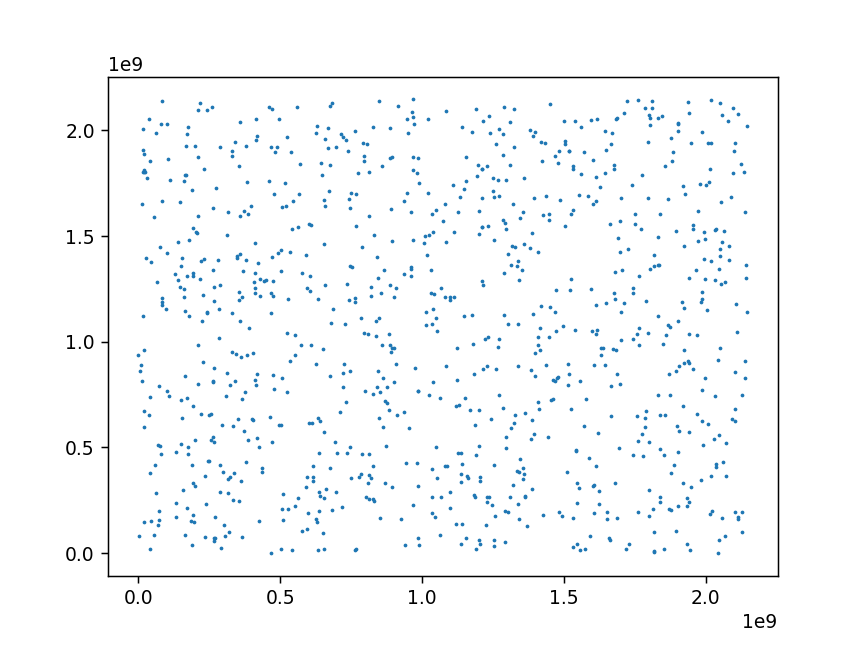

In [31]:
# scatter plot
# all the x_i+1 can be got from x[1:]
# all the xi (you need one less) can be got using x[:-1] - take from 0 to N-1
scatter(xs[1:], xs[:-1], s=1)

In [32]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


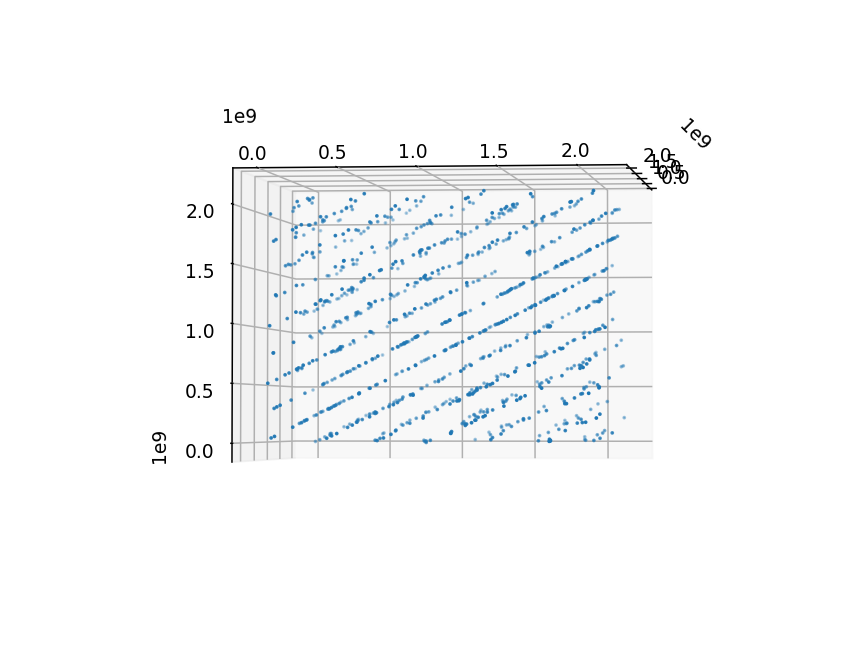

In [33]:
ax = axes(projection='3d')
ax.scatter3D(xs[2:],xs[1:-1], xs[:-2], s=1)

THere is clear banding in the results, showing that the sequence is actually correlated.

## Timing

In [34]:
from timeit import default_timer as timer

In [35]:
# generate 10000 random #s using a loop
start = timer()
for i in range(10000):
    x = random.random()
end = timer()
print(end-start)

0.043519800000012765


In [39]:
# look up help on random.random
?random.random_sample

In [36]:
start = timer()
xs = random.random(10000)
end = timer()
print(end-start)

0.0012515000000803411


So this is certainly at least 10x faster.

<IPython.core.display.Javascript object>


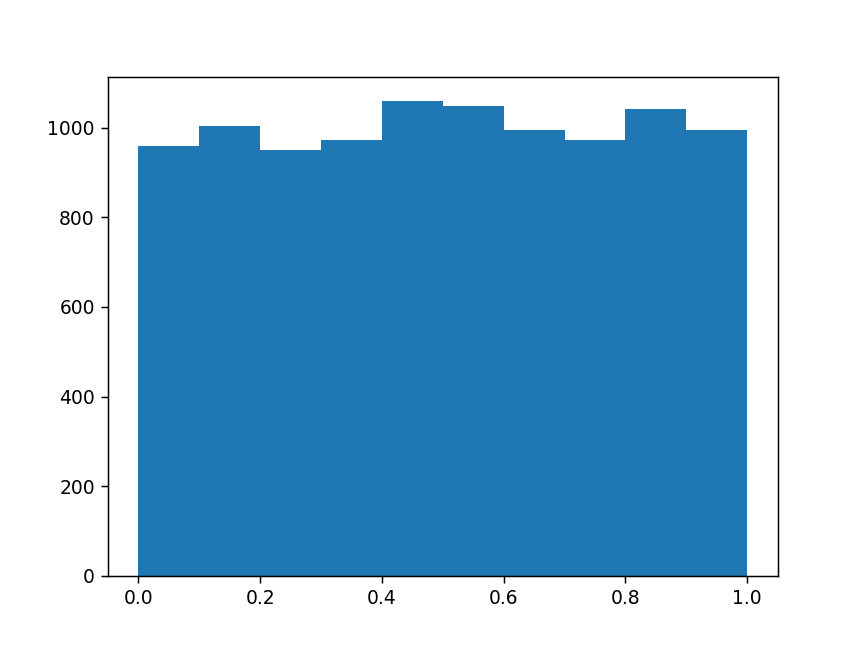

In [43]:
hist(xs);  # default is 10 bins  (using a ';' suppress extra output from the function call)

<IPython.core.display.Javascript object>


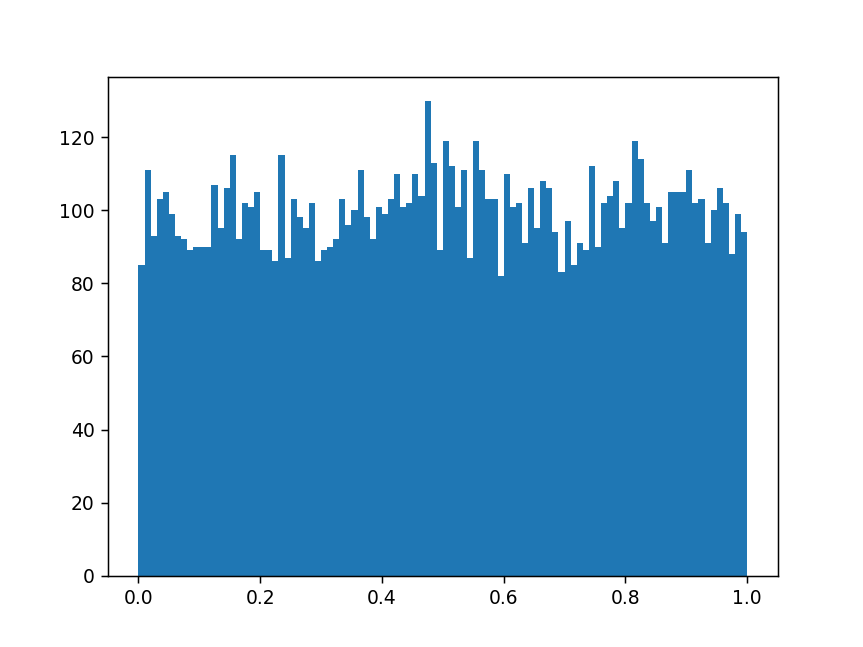

In [42]:
hist(xs, bins=100);

Now you start to see the sqrt(1/N) noise showing up in the bin counts.  Here there's on the order of 1/sqrt(90)~11% error estimate on each bin.

# Exponential decay

If $P(t)$ is the probability that it didn't decay in time $t$. So $P(t)$ satisfies the following equation
\begin{equation}
P(t + \Delta t) = (1 - r \Delta t) P(t)
\end{equation}
That is in a time step $\Delta t$, $(1 - r \Delta t)$ is the probability that it didn't decay.

Rewriting, and taking the limit $\Delta t \rightarrow 0$
\begin{equation}
\frac{dP(t)}{dt} = -r P(t)
\end{equation}

The solution is $P(t) = A \exp(-r t)$.  Then normalizing by integrating from $t=0$ to $t=\infty$, one finds $A = r$.

In [20]:
# generate time series of decays
r = 0.5
dt = 0.1
rdt = r*dt

Ndecay = 1000
decay_times = []
for i in arange(Ndecay):
    t = 0.0
    while random.random() >= rdt:   # decay hasn't happened
        t += dt
    decay_times.append(t)

<IPython.core.display.Javascript object>


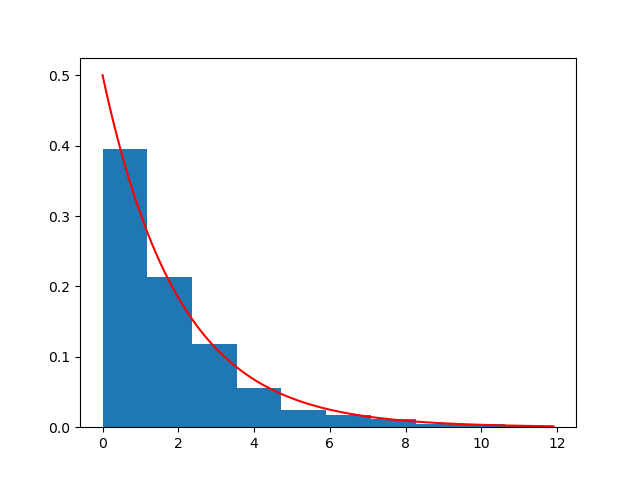

In [22]:
hist(decay_times, density=True)
ts = arange(0, 12, 0.1)
plot(ts, r*exp(-r*ts),'r')

In [23]:
# generate time series of decays, different dt
r = 0.5
dt = 0.01
rdt = r*dt

Ndecay = 1000
decay_times = []
for i in arange(Ndecay):
    t = 0.0
    while random.random() >= rdt: #condition not satisfied, no decay
        t += dt
    decay_times.append(t)

<IPython.core.display.Javascript object>


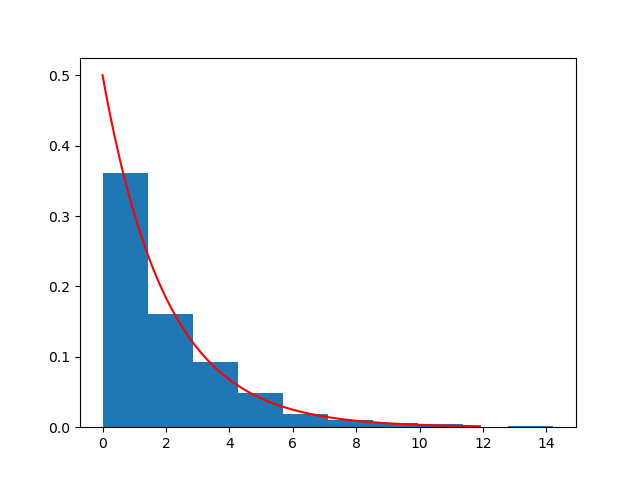

In [24]:
# same result. independent of dt as long as r*dt < 1
hist(decay_times, density=True)
ts = arange(0, 12, 0.1)
plot(ts, r*exp(-r*ts),'r')

In [29]:
# always good to read up on new functions to see how to pass parameters and what they mean
?random.exponential

In [27]:
# note that we need to pass 1/r for the scale
decay_times = random.exponential(scale=1./r, size=(1000))   # note python's scale = beta = 1/r

<IPython.core.display.Javascript object>


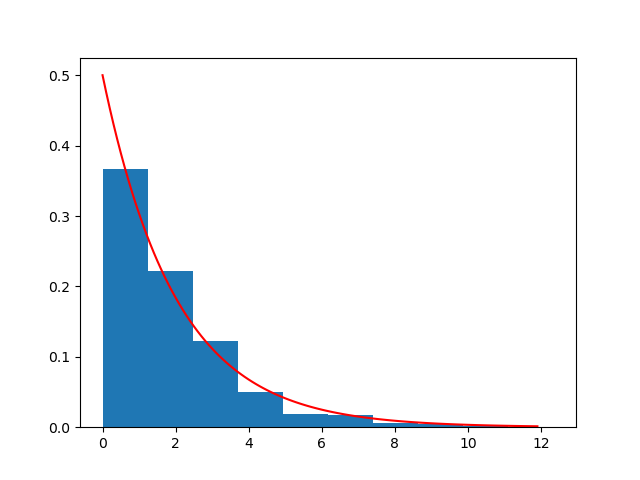

In [28]:
# yay, everything is the same
hist(decay_times, density=True)
ts = arange(0, 12, 0.1)
plot(ts, r*exp(-r*ts),'r')

# Random walks


## 1D random walks

In [44]:
# this code builds up the walks, one walk at a time.  it avoids doing any array operations and we'll
# see that it runs really slow.  it's the intuitive way to do it, but we'll see we can use
# the advantage of python arrays to make it go a lot faster.

Nwalk = 10000
Nsteps = [25, 50, 75, 100]

means = []   # store the computed means of x(N)
MSDs = []    # store the computed means of x(N)^2

start_time = timer()
for Nstep in Nsteps:
    
    xN = []  # stores the final positions of the walks
    for i in range(Nwalk):
        x = 0.0
        for n in range(Nstep):  # do the steps
            if random.random() < 0.5:  # take a step to the left
                x -= 1.0    # you can do operations like -,+,*,/ before the equal sign. so this
                            # is the same as x = x - 1.0
            else:
                x += 1.0
        xN.append(x)
    xN = array(xN)  # convert to array so that you can do numpy operations on it
    
    means.append(mean(xN))  # average over all positions
    MSDs.append(mean(xN*xN))  # average over all xN^2
end_time = timer()
print('elapsed time:', end_time-start_time)

elapsed time: 2.9779980999999225


In [45]:
means

[0.0206, -0.0042, -0.1384, -0.0108]

The means are around 0, but not exactly.  More samples would get them to have smaller noise.

<IPython.core.display.Javascript object>


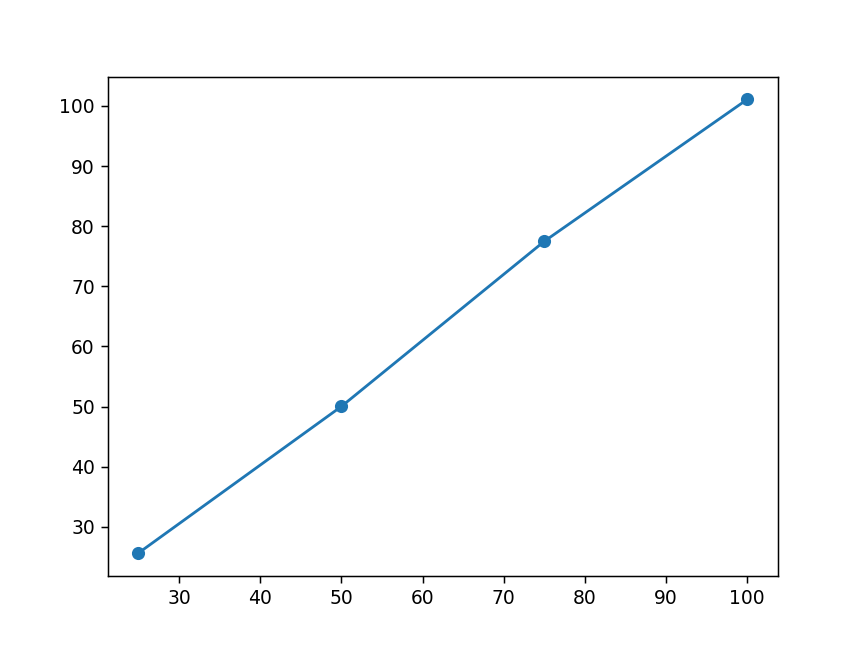

In [46]:
plot(Nsteps, MSDs, 'o-')
# so MSD = <x(N)^2> = N 

The MSD looks linear as expected for a random walk.

In [48]:
# this code avoids doing any internal loops over steps.  it just uses random.random to generate an array of Nwalk x Nstep 
# random values that determine the direction of the steps.
# It uses these to set the set of displacements for each walk, dx which is an Nwalk x Nstep array.
# we can then find the individual x(N) by summing over each row in this array. x(N) is an array of size Nwalk.
# We then find the mean of this array, <x(N)> and the mean of the squared values, MSD = < x(N)*x(N) >
# (if you have an array of values, say A.  You can do any type of logical operation on it and it will 
# return the indices where that condition is true.  So A < 0.5 will return all locations where A is
# less than 0.5.  These type of operations are super helpful and quick).


Nwalk = 10000
Nsteps = [25, 50, 75, 100]

means = []
MSDs = []
start_time = timer()
for Nstep in Nsteps:
    dxs = ones((Nwalk, Nstep))   # start with all positive steps
    rs = random.random((Nwalk, Nstep))   # make an array of random numbers
    dxs[ rs < 0.5] = -1.0   # make -ve steps  (you can use rs < 0.5 to find those indices that satisfy the given condition)

    xN = sum(dxs, axis=1)  # sum up steps over the columns -> x(N)
    xN2 = xN*xN   #x(N)*x(N)
    means.append(mean(xN))
    MSDs.append(mean(xN2))
end_time = timer()
print('elapsed time:', (end_time-start_time))

elapsed time: 0.22250489999987622


In [ ]:
# so using random to generate an array of values without doing any loops and using some 
# indexing lead to a calculation that is between 10-20 times faster!

<IPython.core.display.Javascript object>


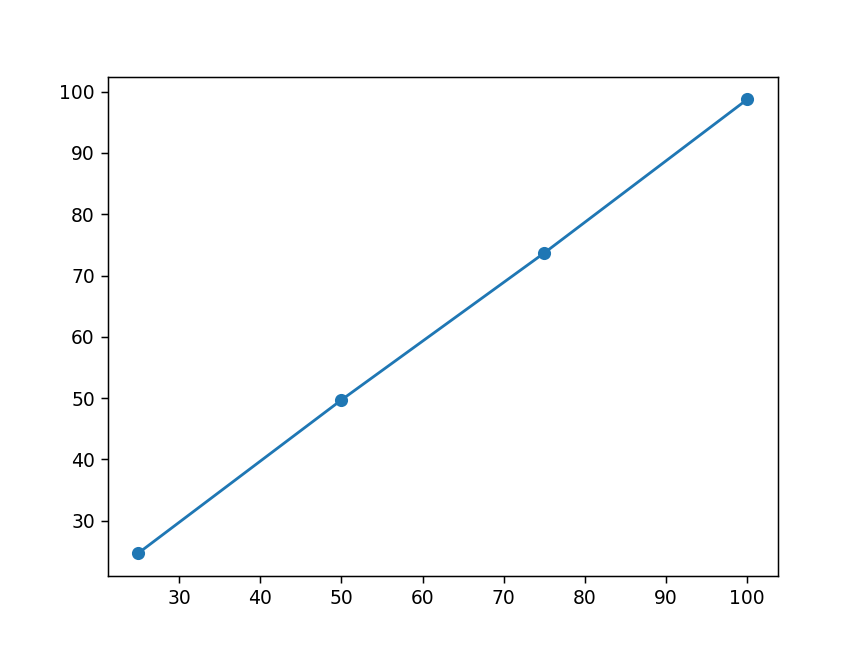

In [49]:
plot(Nsteps, MSDs, 'o-')

<IPython.core.display.Javascript object>


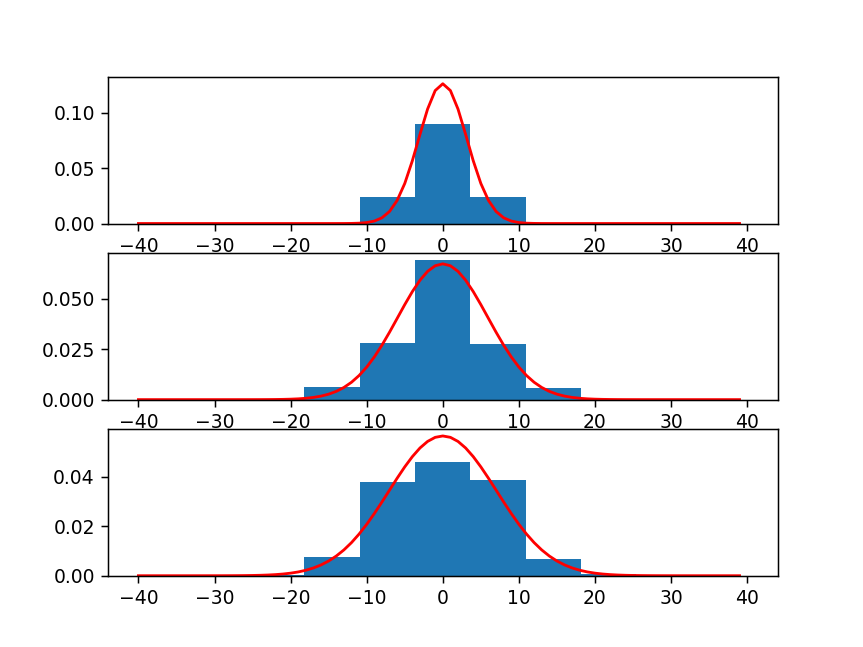

In [52]:
# look at distrubions of x(N)s
# the parent distribution is a gaussian with mean =0 and variance = N*a^2 where here a = 1

Nwalk = 10000
Nsteps = [10, 35, 50]

kk = 0
for Nstep in Nsteps:
    kk +=1
    subplot(3,1, kk)
    dxs = ones((Nwalk, Nstep))   # start with all positive steps
    rs = random.random((Nwalk, Nstep))   # make an array of random numbers
    dxs[ rs < 0.5] = -1.0   # make -ve steps  (you can use rs < 0.5 to find those indices that satisfy the given condition)

    xN = sum(dxs, axis=1)  # sum up steps -> x(N)

    hist(xN, range=(-40,40), density=True, bins=11)
#   these distributions should be gaussians with mean = <x(N)> = 0, 
#   and variance = <x(N)^2> = N, or std dev = sqrt(N)
    xs = arange(-40, 40, 1)
    plot(xs, 1./sqrt(2.*pi*Nstep)*exp(-0.5*xs*xs/Nstep),'r')

the sampled distributions match to the parent distributions within the noise of the sampling.